In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

### The procedure for developing a ML project

1. formation of the problem 
2. receiving data 
3. EDA
4. data preparation 
5. model selection and training 
6. model improvements

### 1. Analyze the dataset and train the model.

### 2. Download the Titanic dataset, namely train.csv and test.csv.

In [185]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [187]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that the dataset has empty values in the <u>Age and Cabin</u> columns.

In [188]:
print('Training data shape:', train_data.shape)
print('Testing data shape:', test_data.shape)

Training data shape: (891, 12)
Testing data shape: (418, 11)


In [189]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [191]:
train_data.isnull().values.any()

True

In [192]:
train_data.duplicated().sum()

0

### 3. EDA_Study the data. Make a visualization that you think is necessary. Construct a correlation matrix.

The number of people who survived.

0    549
1    342
Name: Survived, dtype: int64

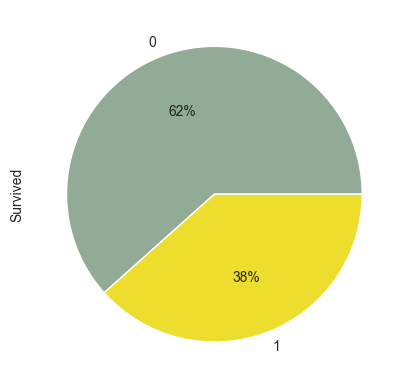

In [193]:
train_data.Survived.value_counts().plot.pie(autopct=lambda p:f'{p:.0f}%', colors=['#91ab96','#edde2d'])
train_data.Survived.value_counts()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

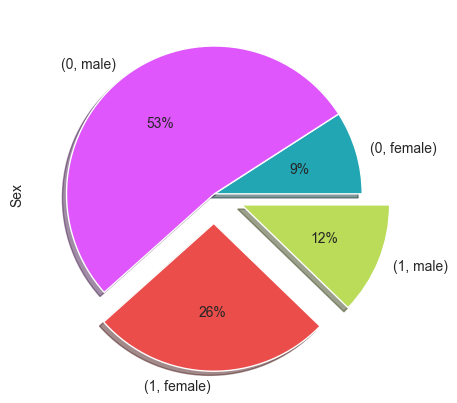

In [194]:
colors = ('#22a6b3', '#e056fd', '#eb4d4b', '#badc58')
train_data.groupby(['Survived','Sex']).Sex.count().plot.pie(autopct=lambda p: f'{p:.0f}%', explode=[0,0,0.2,0.2], shadow=True, colors=colors)
train_data.groupby(['Survived','Sex']).Sex.count()

During the Titanic disaster, out of 891 people on board, only 38% survived, the other 62% died.

[Text(0, 0, '314'), Text(0, 0, '577')]

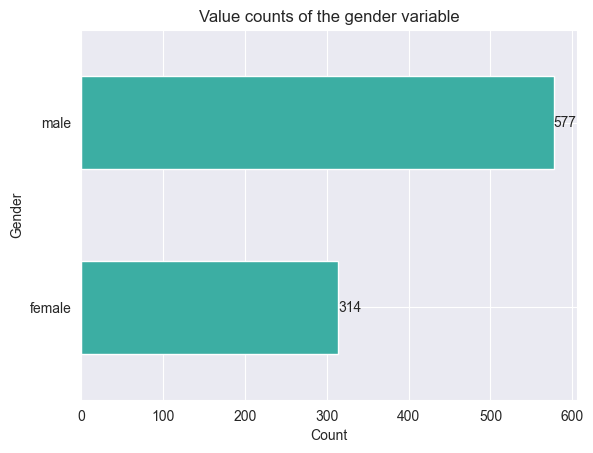

In [195]:
# create barh plot to visualize count by gender
ax=train_data.Sex.value_counts().sort_index().plot.barh(color='#3caea3')
sns.set_style('darkgrid')
plt.title('Value counts of the gender variable')
plt.xlabel('Count')
plt.ylabel('Gender')
#annotate bars
ax.bar_label(ax.containers[0])

In [202]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = (sum(women)/len(women))*len(women)
w1 = sum(women)/len(women)
e1=1-w1
print('Of the women, where 314 - survived:', '{:.0f}'.format(rate_women), 'perc','{:.2f}'.format(w1) , ',', 'others:', '{:.2f}'.format(e1))

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = (sum(men)/len(men))*len(men)
m1 = sum(men)/len(men)
e2 = 1-m1
print('Of the men, where 577 - survived:', '{:.0f}'.format(rate_men), 'perc','{:.2f}'.format(m1), ',', 'others:', '{:.2f}'.format(e2))
tot = rate_women+rate_men
print('-'*23,'Total:', tot,'people who survived')



Of the women, where 314 - survived: 233 perc 0.74 , others: 0.26
Of the men, where 577 - survived: 109 perc 0.19 , others: 0.81
----------------------- Total: 342.0 people who survived


Out of 891 persons, 577 men and 314 women.

**342 people survived, of which 233 women make up more than half of 68% and 109 men - 32%.**

In [203]:
pd.crosstab(train_data.Survived,train_data.Sex, margins=True).style.background_gradient(cmap='YlOrRd')

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [207]:
train_data.groupby(['Sex', 'Survived']).Survived.count()/train_data.groupby('Sex').Survived.count()

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

<U>How many people are in different classes? and what is the percentage of each class?</U>

3    491
1    216
2    184
Name: Pclass, dtype: int64

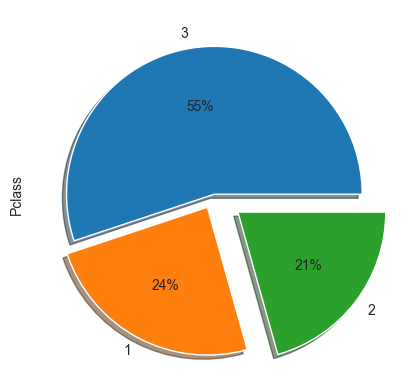

In [213]:
train_data.Pclass.value_counts().plot.pie(autopct=lambda p:f'{p:.0f}%',explode=[0,0.1,0.2],shadow=True)
# autopct='%.0f%%'
# autopct='%.2f'
#autopct=lambda pct: func(pct),
train_data.Pclass.value_counts()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

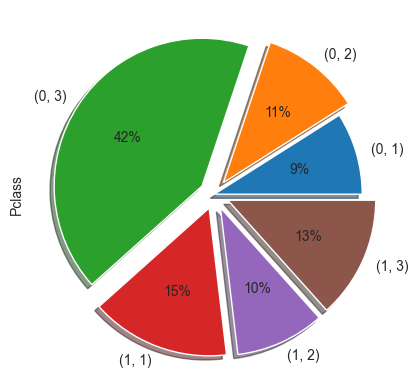

In [222]:
colors = ('#22a6b3', '#e056fd', '#eb4d4b', '#badc58')
train_data.groupby(['Survived','Pclass']).Pclass.count().plot.pie(autopct=lambda p: f'{p:.0f}%', explode=[0,0.1,0.1,0.1,0.1,0.1],shadow=True)
train_data.groupby(['Survived','Pclass']).Pclass.count()

We can see:
- from the 1st class there were 24% of the total number - 15% survived;
- from the 2nd class there were 31% of the total number - 10% survived;
- from the 3rd class there were 55% of the total number - 13% survived.

<u>How many people survived in **each class**?</u>
- Ticket class_pclass: A proxy for socio-economic status (SES)
- 1st = Upper, 2nd = Middle, 3rd = Lower

In [223]:
cs1 = train_data.loc[train_data.Pclass == 1 ]['Survived']
rate_cs1 = (sum(cs1)/len(cs1))*len(cs1)
s1=sum(cs1)/len(cs1)
rate_n1 = 1-s1
print('From the 1st class, where 216 people survived:', '{:.0f}'.format(rate_cs1),'perc','{:.2f}'.format(s1),'others:', '{:.2f}'.format(rate_n1))

cs2 = train_data.loc[train_data.Pclass == 2 ]['Survived']
rate_cs2 = (sum(cs2)/len(cs2))*len(cs2)
s2=sum(cs2)/len(cs2)
rate_n2=1-s2
print("From the 2nd class, where 184 people survived:", '{:.0f}'.format(rate_cs2),'perc','{:.2f}'.format(s2),'others:', '{:.2f}'.format(rate_n2))

cs3 = train_data.loc[train_data.Pclass == 3 ]['Survived']
rate_cs3 = (sum(cs3)/len(cs3))*len(cs3)
s3= sum(cs3)/len(cs3)
rate_n3 = 1-s3
print("From the 3rd class, where 491 people survived:", '{:.0f}'.format(rate_cs3),'perc','{:.2f}'.format(s3),'others:', '{:.2f}'.format(rate_n3))
tot = '{:.0f}'.format(rate_cs1+rate_cs2+rate_cs3)
print('-'*39,'Total:', tot,'people who survived')

From the 1st class, where 216 people survived: 136 perc 0.63 others: 0.37
From the 2nd class, where 184 people survived: 87 perc 0.47 others: 0.53
From the 3rd class, where 491 people survived: 119 perc 0.24 others: 0.76
--------------------------------------- Total: 342 people who survived


In [224]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True).style.background_gradient(cmap='YlOrRd')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [228]:
(train_data.groupby(['Pclass','Survived']).Survived.count()*100)/train_data.groupby('Pclass').Survived.count()

Pclass  Survived
1       0           37.037037
        1           62.962963
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [229]:
train_data.groupby(['Pclass','Survived']).Survived.count().to_frame()

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

In [230]:
train_data.groupby(['Sex','Survived','Pclass']).Survived.count().to_frame()

Survived
Sex    Survived Pclass          
female 0        1              3
                2              6
                3             72
       1        1             91
                2             70
                3             72
male   0        1             77
                2             91
                3            300
       1        1             45
                2             17
                3             47

In [231]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='YlOrRd')

In [234]:
train_data.groupby(by=['Survived']).mean()["Age"]

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

This show that average age of people who survived was around 28 years old

Family_Size is created by adding SibSp, Parch and 1. SibSp is the count of siblings and spouse, and Parch is the count of parents and children. Those columns are added in order to find the total size of families. Adding 1 at the end, is the current passenger. Graphs have clearly shown that family size is a predictor of survival because different values have different survival rates.

- Family Size with 1 are labeled as **Alone**
- Family Size with 2, 3 and 4 are labeled as **Small**
- Family Size with 5 and 6 are labeled as **Medium**
- Family Size with 7, 8 and 11 are labeled as **Large**

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

In [235]:
ddf = train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).sum()# mean()
ddf['Survived'] = ddf['Survived']/ddf['Survived'].sum()
ddf

,SibSp,Survived
0,0,0.614035
1,1,0.327485
2,2,0.038012
3,3,0.011696
4,4,0.008772
5,5,0.000000
6,8,0.000000


We see that 'SibSp' = 0(no sibling) has 61% survival.

In [236]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient(cmap='YlOrRd')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


- parch: The dataset defines family relations in this way

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


In [238]:
ddf = train_data[['Parch','Survived']].groupby(['Parch'], as_index=False).sum()# mean()
ddf['Survived'] = ddf['Survived']/ddf['Survived'].sum()
ddf

,Parch,Survived
0,0,0.681287
1,1,0.190058
2,2,0.116959
3,3,0.008772
4,4,0.000000
5,5,0.002924
6,6,0.000000


68% survived - those who did not have parents on the ship or were not parents.

In [239]:
pd.crosstab(train_data.Parch,train_data.Pclass).style.background_gradient(cmap='YlOrRd')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


### Correlation Matrix

A correlation matrix is a common tool used to compare the coefficients of correlation between different features (or attributes) in a dataset. It allows us to visualize how much (or how little) correlation *exists* between different variables.

Since the correlation matrix allows us to identify variables that have *high degrees* of correlation, they allow us to reduce the number of features we may have in a dataset.
- The closer the value is to 1 (or -1), the stronger a relationship.
- The closer a number is to 0, the weaker the relationship.

             PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare
PassengerId         1.00     -0.01   -0.04  0.04  -0.06  -0.00  0.01
Survived           -0.01      1.00   -0.34 -0.08  -0.04   0.08  0.26
Pclass             -0.04     -0.34    1.00 -0.37   0.08   0.02 -0.55
Age                 0.04     -0.08   -0.37  1.00  -0.31  -0.19  0.10
SibSp              -0.06     -0.04    0.08 -0.31   1.00   0.41  0.16
Parch              -0.00      0.08    0.02 -0.19   0.41   1.00  0.22
Fare                0.01      0.26   -0.55  0.10   0.16   0.22  1.00


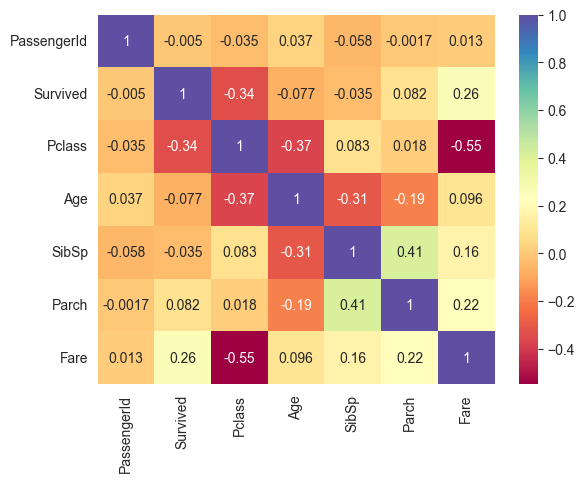

In [240]:
sns.heatmap(train_data.corr(), cmap='Spectral', annot=True)
print(train_data.corr().round(2))

Positive relationship:
 - ✔︎ <u>Parch and SibSp</u> Parents with children, probably a family that traveled together. In this case, since the correlation coefficient is **0.41**, which is closer to 0.5 than 0, we can describe the relationship between parents and siblings as moderately positive. This suggests that there is a tendency for passengers who have more parents traveling with them to also have more siblings traveling with them on the same ship;
- ✔︎  <u>Survived and Fare</u> The level of survivors directly depends on the tariff they bought. A correlation coefficient of 0.26 between survived and fare indicates a weak positive linear relationship between the two variables. This means that there is a slight tendency for passengers who paid higher fares to have a higher survival rate than those who paid lower fares;
- ✔︎ Family ties and ticket price are correlated within **0.16 and 0.22**;

Negative relationship:
 - ✘ <u>Fare and Pclass</u> A correlation coefficient of **-0.55** between class on ship and fare indicates a moderate negative linear relationship between the two variables. This suggests that there is a tendency for passengers who purchase higher class tickets to pay less fare than those who purchase lower class tickets on the same ship;
    
 - ✘ <u>Age and Pclass</u> A correlation coefficient of **-0.37** between age and class on ship indicates a weak negative linear relationship between the two variables. This means that there is a slight tendency for older passengers to book lower class tickets on the ship and younger passengers to book higher class tickets;
 - ✘ <u>Survived and Pclass</u> A correlation coefficient of **-0.34** between survived and class on ship indicates a weak negative linear relationship between the two variables. This means that there is a slight tendency for passengers who survived to have booked higher class tickets on the ship and those who did not survive to have booked lower class tickets; 
 - ✘ <u>Age and SibSp</u> is **-0.31**;
 - ✘ <u>Parch and Age</u> is **-0.19**.
    

### 4. Perform a data cleanup as needed. Identify the set of traits that you think most influence human survival.

In [241]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harder, Mr. George Achilles",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [242]:
# some data is  NULL

print(pd.isnull(train_data).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

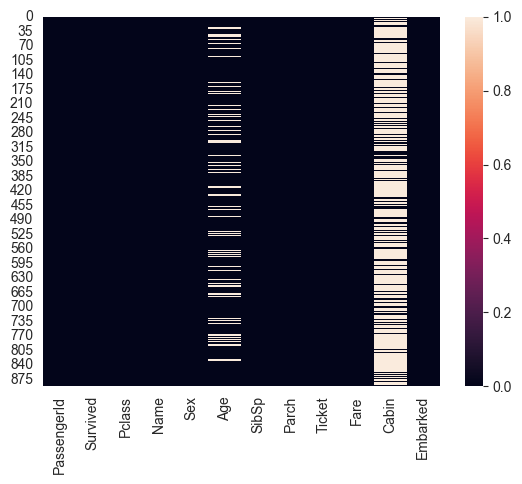

In [243]:
sns.heatmap(train_data.isna())

False    714
True     177
Name: Age, dtype: int64

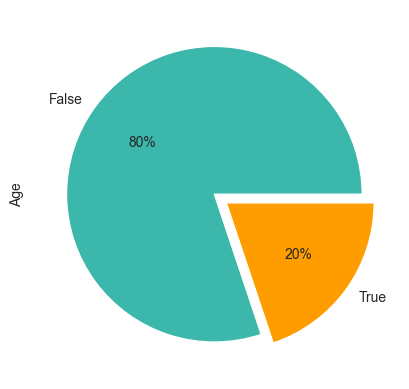

In [244]:
train_data.Age.isnull().value_counts().plot.pie(autopct=lambda p:f'{p:.0f}%', explode=[0,0.1], colors=['#3cb7ab','#ff9d00'])
train_data.Age.isnull().value_counts()

 The "no null values" category would occupy 80% of the chart and the "null values" category would occupy 20% of the chart.

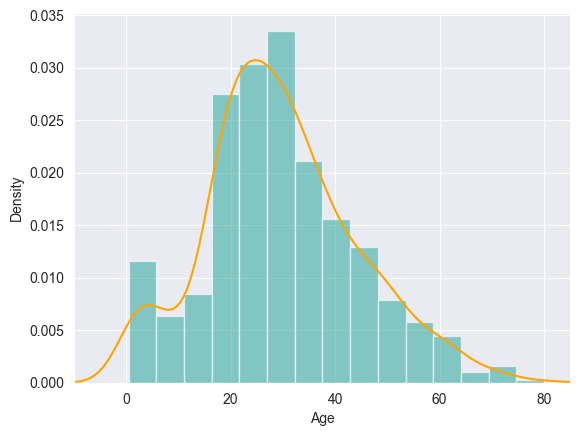

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [245]:
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='#3caea3', alpha=0.6)
train_data["Age"].plot(kind='density', color='orange')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# mean age
print('The mean of "Age" is %.2f' %(train_data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_data["Age"].median(skipna=True)))

- FILL in the 'Age' column using the average value(mean)

In [246]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [247]:
# Check before 177 after 0
train_data['Age'].isnull().sum()

0

<AxesSubplot:>

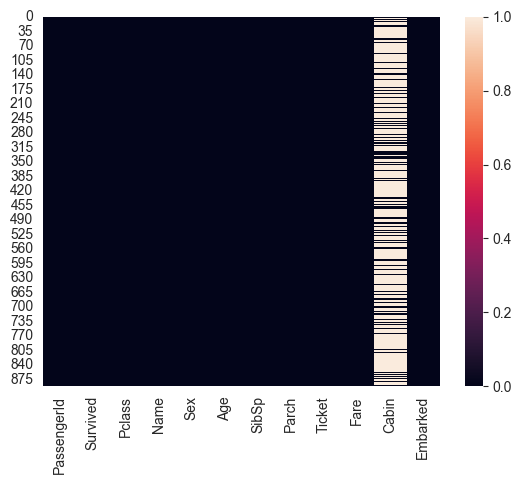

In [248]:
sns.heatmap(train_data.isna())

In [249]:
train_data.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
C22 C26        3
              ..
D56            1
E40            1
B39            1
C47            1
E38            1
Name: Cabin, Length: 147, dtype: int64

In [250]:
# add the new column 'cabin' with one letter
train_data['cabin'] = train_data.Cabin.apply(lambda x: str(x)[0])
print(train_data.cabin.value_counts())
pd.pivot_table(train_data, index='Survived', columns='cabin', values ='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin, dtype: int64


cabin,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


- Create fictitious data using get_dummies or convert column 'Sex' to numerical values

In [251]:
# drop
gender = pd.get_dummies(train_data['Sex'], drop_first=True)
train_data['Gender']=gender
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,1


- Drop the columns which aren`t required

In [252]:
train_data.drop(['Name','Sex','Ticket', 'Embarked','Cabin','cabin','PassengerId'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### 5 &6 Train a linear regression on train.csv on these features. For classification using linear regression. Improve your performance by training logistic regression.

- 5.1 Analyze the output of the model, namely, calculate the metrics of the classification task for test.csv.

- 5.2 Compare with metrics for train.csv


**The following metrics are of interest:**
- Accuracy
- Precision
- Recall
- F1 Score
- ROC
- AUC
- Confusion Matrix

### Separate Dependent and Independent variables

In [253]:
x = train_data[['Pclass', 'Age','SibSp', 'Parch','Fare','Gender']]
y = train_data['Survived']       
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Linear Regression**

In [254]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

# pred = np.clip(pred,0,1)
pred = np.where(pred > 0.5, 1, 0)
print(pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


> numpy.clip(a, a_min, a_max, out=None, **kwargs)

Clip (limit) the values in an array.
Given an interval, values outside the interval are clipped to the interval edges. 

For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

**Logistic Regression**

In [255]:
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(x_train, y_train)
pred2 = lr2.predict(x_test)
pred2

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

We said that *linear regression* model basically finds the best value for **the intercept and slope,** which results in a line that best fits the data. 

In [256]:
print(round(lr.intercept_,2))

1.3


And the then execute the following script to retrieving the slope (coefficient of x):

In [257]:
print(lr.coef_)

[-1.60069778e-01 -6.29930472e-03 -4.87249416e-02 -1.45409296e-02
  3.71829582e-04 -5.14883284e-01]


- **Metrics - MAE, MSE, RMSE**

In [258]:
print('LIN (MAE) Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred),2))
print('LOG (MAE) Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('LIN (MSE) Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred),2))
print('LOG (MSE) Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('LIN (RMSE) Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2))
print('LOG (RMSE) Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

LIN (MAE) Mean Absolute Error: 0.23
LOG (MAE) Mean Absolute Error: 0.2
LIN (MSE) Mean Squared Error: 0.23
LOG (MSE) Mean Squared Error: 0.2
LIN (RMSE) Root Mean Squared Error: 0.48
LOG (RMSE) Root Mean Squared Error: 0.45


###  7. LIN| LOG Confusion Matrix

**Calculate Rates** It is calculated using the following formula: 
   + Accuracy = (TP + TN)/ (TP + FP + FN + TN) 
   + Error Rate = (FP + FN)/ (TP + FP + FN + TN) 
   + Recall Rate = TP/ (TP + FN) 
   + Precision Rate = TP/ (TP + FP) 
   + F-measure = (2* Recall*Precision)/ (Recall + Precision) 

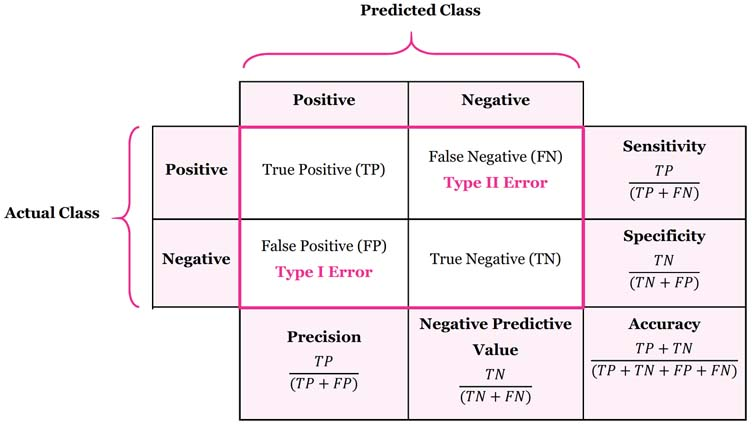

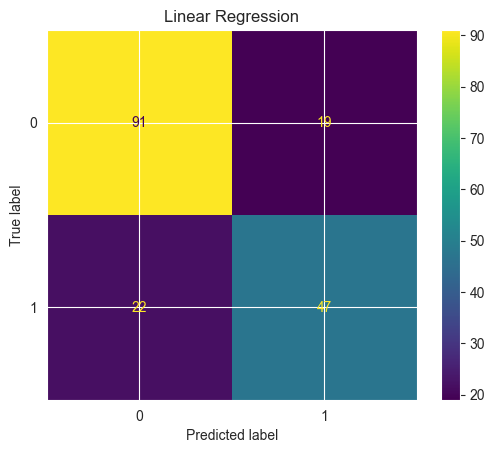

In [259]:
cm = metrics.confusion_matrix(y_test, pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Linear Regression')
plt.show()

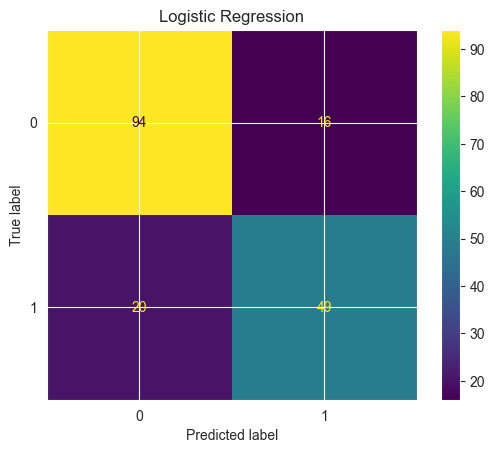

In [260]:
cm2 = metrics.confusion_matrix(y_test, pred2, labels=lr2.classes_)
# cm = metrics.confusion_matrix(y_test, pred2, labels=lr2.classes_, normalize='all')
# cm = metrics.confusion_matrix(y_test, pred2, labels=lr2.classes_, normalize='true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2, 
                                      display_labels=lr2.classes_)
disp.plot()
plt.title('Logistic Regression')
plt.show()

### LIN | LOG Build a text report showing the main classification metrics

In [261]:
print(' '*4,'LIN REG')
print(metrics.classification_report(y_test, pred))
print(' '*4,'LOG REG')
print(metrics.classification_report(y_test, pred2))

     LIN REG
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.71      0.68      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179

     LOG REG
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



- **The precision** is intuitively the ability of the classifier not to label a negative sample as positive. 
- **The recall** is intuitively the ability of the classifier to find all the positive samples.
- **The F-beta** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
- **The support** is the number of samples of the true response that lie in that class.
+ **Micro-averaged:** all samples equally contribute to the final averaged metric
+ **Macro-averaged:** all classes equally contribute to the final averaged metric
+ **Weighted-averaged:** each classes’s contribution to the average is weighted by its size


**1. LIN | LOG accuracy_score**

In [262]:
ac_n=round(metrics.accuracy_score(y_test, pred),2) # with normalize
ac_n2=round(metrics.accuracy_score(y_test, pred2),2) # with normalize
ac_wn=round(metrics.accuracy_score(y_test, pred, normalize=False)) # without normalize
ac_wn2=metrics.accuracy_score(y_test, pred2, normalize=False) # without normalize

df=pd.DataFrame({'metrics/regres':['with normalize','without normalize'],
                'LIN': [ac_n, ac_wn],
                 'LOG': [ac_n2, ac_wn2]
                })
print(' '*7,'LIN | LOG accuracy_score')
print('^'*40)
print(df)

        LIN | LOG accuracy_score
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
      metrics/regres     LIN    LOG
0     with normalize    0.77    0.8
1  without normalize  138.00  143.0


**2. LIN | LOG precision_score**

In [263]:
ps=round(metrics.precision_score(y_test, pred),2)
ps0=round(metrics.precision_score(y_test, pred2),2)
ps1=metrics.precision_score(y_test, pred, average=None, zero_division=1)
ps11=metrics.precision_score(y_test, pred2, average=None, zero_division=1)
ps2=round(metrics.precision_score(y_test, pred, average='macro'),2)
ps22=round(metrics.precision_score(y_test, pred2, average='macro'),2)
ps3=round(metrics.precision_score(y_test, pred, average='micro'),2)
ps33=round(metrics.precision_score(y_test, pred2, average='micro'),2)
ps4=round(metrics.precision_score(y_test, pred, average='weighted'),2)
ps44=round(metrics.precision_score(y_test, pred2, average='weighted'),2)

df = pd.DataFrame({'regres':['LIN', 'LOG'],
                   'tot': [ps, ps0],
                   'macro': [ps2, ps22],
                   'micro': [ps3,ps33],
                   'weighted': [ps4, ps44]
                  })
print(" "*9,'LIN | LOG precision_score')
print('^'*45)
print( df)
print('^'*45)
print('LIN ', ps1,'LOG',ps11)


          LIN | LOG precision_score
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  regres   tot  macro  micro  weighted
0    LIN  0.71   0.76   0.77      0.77
1    LOG  0.75   0.79   0.80      0.80
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
LIN  [0.80530973 0.71212121] LOG [0.8245614  0.75384615]


**3. LIN | LOG recall_score**

In [264]:
rs=round(metrics.recall_score(y_test, pred),2)
rs0=round(metrics.recall_score(y_test, pred2),2)
rs1=metrics.recall_score(y_test, pred, average=None)
rs11=metrics.recall_score(y_test, pred2, average=None)
rs2=round(metrics.recall_score(y_test, pred, average='macro'),2)
rs22=round(metrics.recall_score(y_test, pred2, average='macro'),2)
rs3=round(metrics.recall_score(y_test, pred, average='micro'),2)
rs33=round(metrics.recall_score(y_test, pred2, average='micro'),2)
rs4=round(metrics.recall_score(y_test, pred, average='weighted'),2)
rs44=round(metrics.recall_score(y_test, pred2, average='weighted'),2)

df= pd.DataFrame({'regres':['LIN', 'LOG'],
                   'tot': [rs, rs0],
                   'macro': [rs2, rs22],
                   'micro': [rs3,rs33],
                   'weighted': [rs4, rs44]
                  })
print(" "*9,'LIN | LOG recall_score')
print('^'*45)
print( df)
print('^'*45)
print('LIN ', rs1,'LOG',rs11)


          LIN | LOG recall_score
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  regres   tot  macro  micro  weighted
0    LIN  0.68   0.75   0.77      0.77
1    LOG  0.71   0.78   0.80      0.80
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
LIN  [0.82727273 0.68115942] LOG [0.85454545 0.71014493]


**4. LIN | LOG f1_score**

In [265]:
f=round(metrics.f1_score(y_test, pred),2)
f0=round(metrics.f1_score(y_test, pred2),2)
f1=metrics.f1_score(y_test, pred, average=None)
f11=metrics.f1_score(y_test, pred2, average=None)
f2=round(metrics.f1_score(y_test, pred, average='macro'),2)
f22=round(metrics.f1_score(y_test, pred2, average='macro'),2)
f3=round(metrics.f1_score(y_test, pred, average='micro'),2)
f33=round(metrics.f1_score(y_test, pred2, average='micro'),2)
f4=round(metrics.f1_score(y_test, pred, average='weighted'),2)
f44=round(metrics.f1_score(y_test, pred2, average='weighted'),2)
f5=round(metrics.f1_score(y_test, pred, average='binary'),2)
f55=round(metrics.f1_score(y_test, pred2, average='binary'),2)

df= pd.DataFrame({'regres':['LIN', 'LOG'],
                   'tot': [f, f0],
                   'macro': [f2, f22],
                   'micro': [f3,f33],
                   'weighted': [f4, f44]
                  })
print(" "*9,'LIN | LOG f1_score')
print('^'*45)
print( df)
print('^'*45)
print('LIN ', f1,'LOG',f11)



          LIN | LOG f1_score
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  regres   tot  macro  micro  weighted
0    LIN  0.70   0.76   0.77      0.77
1    LOG  0.73   0.79   0.80      0.80
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
LIN  [0.8161435 0.6962963] LOG [0.83928571 0.73134328]


**5. LIN | LOG roc_curve_Receiver operating characteristic (ROC)**

In [266]:
roc=metrics.roc_curve(y_test, pred)
roc0=metrics.roc_curve(y_test, pred2)
fpr, tpr, thresholds=metrics.roc_curve(y_test, pred)
fpr0, tpr0, thresholds0=metrics.roc_curve(y_test, pred2)
df= pd.DataFrame({'regres':['LIN', 'LOG'],
                   'roc': [roc, roc0],
                   'fpr': [fpr, fpr0],
                   'tpr': [tpr,tpr0],
                   'thresholds': [thresholds, thresholds0]
                  })
print(" "*30,'LIN | LOG roc_curve')
print('^'*77)
print( df)
print('^'*77)


                               LIN | LOG roc_curve
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  regres                                                roc  \
0    LIN  ([0.0, 0.17272727272727273, 1.0], [0.0, 0.6811...   
1    LOG  ([0.0, 0.14545454545454545, 1.0], [0.0, 0.7101...   

                               fpr                             tpr thresholds  
0  [0.0, 0.17272727272727273, 1.0]  [0.0, 0.6811594202898551, 1.0]  [2, 1, 0]  
1  [0.0, 0.14545454545454545, 1.0]  [0.0, 0.7101449275362319, 1.0]  [2, 1, 0]  
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


**6. LIN | LOG auc_Compute Area Under the Curve (AUC)**

In [267]:
auc=round(metrics.auc(fpr, tpr),2)
auc0=round(metrics.auc(fpr0, tpr0),2)
print("LIN:",auc, "LOG:",auc0)

LIN: 0.75 LOG: 0.78


### Comparison of Linear and Logistic regression metrics.

In [268]:
df = pd.DataFrame({ 'reg': ['LIN', 'LOG', 'diff', 'diff(%)'],
                   
'MAE': [round(metrics.mean_absolute_error(y_test, pred),2),
        round(metrics.mean_absolute_error(y_test, pred2),2),
        round(metrics.mean_absolute_error(y_test, pred2),2)-round(metrics.mean_absolute_error(y_test, pred),2),
       round(metrics.mean_absolute_error(y_test, pred2)/metrics.mean_absolute_error(y_test, pred),2)],
'MSE': [round(metrics.mean_squared_error(y_test, pred),2),
        round(metrics.mean_squared_error(y_test, pred2),2),
        round(metrics.mean_squared_error(y_test, pred2),2)-round(metrics.mean_squared_error(y_test, pred),2),
        round(metrics.mean_squared_error(y_test, pred2)/metrics.mean_squared_error(y_test, pred),2)],  
'RMSE' : [round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2),
          round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2),
          round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2)-round(np.sqrt(metrics.mean_squared_error(y_test, pred)),2),
          round(np.sqrt(metrics.mean_squared_error(y_test, pred2))/np.sqrt(metrics.mean_squared_error(y_test, pred)),2)],
'1.Accuracy' : [round(metrics.accuracy_score(y_test, pred),2),
                round(metrics.accuracy_score(y_test, pred2),2),
                round(metrics.accuracy_score(y_test, pred2),2)-round(metrics.accuracy_score(y_test, pred),2),
                round(metrics.accuracy_score(y_test, pred2)/metrics.accuracy_score(y_test, pred),2)],
'2.Precision' : [round(metrics.precision_score(y_test, pred),2),
                 round(metrics.precision_score(y_test, pred2),2),
                 round(metrics.precision_score(y_test, pred2),2)-round(metrics.precision_score(y_test, pred),2),
                 round(metrics.precision_score(y_test, pred2)/metrics.precision_score(y_test, pred),2)], 
'3.Recall': [round(metrics.recall_score(y_test, pred),2),
             round(metrics.recall_score(y_test, pred2),2),
             round(metrics.recall_score(y_test, pred2),2)-round(metrics.recall_score(y_test, pred),2),
             round(metrics.recall_score(y_test, pred2)/metrics.recall_score(y_test, pred),2)],
'4.F1': [round(metrics.f1_score(y_test, pred),2),
         round(metrics.f1_score(y_test, pred2),2),
         round(metrics.f1_score(y_test, pred2),2)-round(metrics.f1_score(y_test, pred),2),
         round(metrics.f1_score(y_test, pred2)/metrics.f1_score(y_test, pred),2)],
'6.AUC': [round(metrics.auc(fpr, tpr),2),
         round(metrics.auc(fpr0, tpr0),2),
         round(metrics.auc(fpr0, tpr0),2)-round(metrics.auc(fpr, tpr),2),
         round(metrics.auc(fpr0, tpr0)/metrics.auc(fpr, tpr),2)],
'7.CM': [cm,
         cm2,
         cm2-cm,
         0]
                  })
print(df)

       reg   MAE   MSE  RMSE  1.Accuracy  2.Precision  3.Recall  4.F1  6.AUC  \
0      LIN  0.23  0.23  0.48        0.77         0.71      0.68  0.70   0.75   
1      LOG  0.20  0.20  0.45        0.80         0.75      0.71  0.73   0.78   
2     diff -0.03 -0.03 -0.03        0.03         0.04      0.03  0.03   0.03   
3  diff(%)  0.88  0.88  0.94        1.04         1.06      1.04  1.05   1.04   

                   7.CM  
0  [[91, 19], [22, 47]]  
1  [[94, 16], [20, 49]]  
2    [[3, -3], [-2, 2]]  
3                     0  


**CONCLUSION:**

The main difference between linear and logistic regression is different area applications and solved problems. Logistic – solves the problem of classification, linear - finding a linear correlation between two or more quantities variables.

<u>1. How logistic regression is more accurate than linear regression?</u>

>Logistic regression is more computationally intensive than linear regression, because it involves a larger and more complex algorithm.

<u>2. What wrong predictions did linear regression make when logistic got it right?</u>